# I. Preparing data

In [2]:
%load_ext autoreload
%autoreload 2

Import lib

In [3]:
import numpy as np
import os
import pandas as pd

Define directions

In [4]:
ORIGINAL_DATA_dir = 'DATASETS/ORIGINAL_DATA'
STUDIED_DATA_dir = 'DATASETS/STUDIED_DATA'

## I.1 Exploring real data

In [5]:
X_orig = np.loadtxt(os.path.join(ORIGINAL_DATA_dir, 'MLComp/MLComp.data'))

Data statistics:

In [6]:
from data_statistics import *
print "sparsity = %f"%sparsity(X_orig)
print "Number of models = %i"%num_model(X_orig)
print "Number of datasets = %i"%num_dataset(X_orig)
if sparsity(X_orig) == 0:
    print "Rank of matrix = %i"%rank(X_orig)
else:
    print "Matrix contains NaN, cannot define the rank"

sparsity = 0.932033
Number of models = 384
Number of datasets = 724
Matrix contains NaN, cannot define the rank


Load processed data.
Note: Datasets in STUDIED_DATA_dir are all the same as they are in ORIGINAL_DATA_dir, except for MLComp for which we processed to extract a dense part of the original data to reduce the sparsity.

In [7]:
X_proc = np.loadtxt(os.path.join(STUDIED_DATA_dir, 'statlog/statlog.data'))

In [8]:
print "sparsity = %f"%sparsity(X_proc)
print "Number of models = %i"%num_model(X_proc)
print "Number of datasets = %i"%num_dataset(X_proc)
if sparsity(X_proc) == 0:
    print "Rank of matrix = %i"%rank(X_proc)
else:
    print "Matrix contains NaN, cannot define the rank"

sparsity = 0.000000
Number of models = 24
Number of datasets = 22
Rank of matrix = 22


Use SVD to complete missing values:

In [9]:
from SVD_complete_missingValues import *
X_comp, _, reconstruction_err, _, _, _ = SVD_complete_missingValues(X_proc)

IndentationError: unindent does not match any outer indentation level (SVD_complete_missingValues.py, line 107)

In [10]:
print reconstruction_err

NameError: name 'reconstruction_err' is not defined

In [11]:
print "sparsity = %f"%sparsity(X_comp)
if sparsity(X_comp) == 0:
    print "Rank of matrix = %i"%rank(X_comp)
else:
    print "Matrix contains NaN, cannot define the rank"

NameError: name 'X_comp' is not defined

## I.2 Generate random data

In [12]:
from random_data_generator import random_data
S_rank2 = random_data(100, 100, 2) # generate random matrix of rank 2
S_rank4 = random_data(100, 100, 4) # generate random matrix of rank 4
S_rank5 = random_data(100, 100, 6) # generate random matrix of rank 6
S_rank8 = random_data(100, 100, 8) # generate random matrix of rank 8

# II. APT

## II.1 APT on random data (no missing value)

### Heatmap Hierarchical clustering of random matrix 100X100, rank 5 (no missing value)

/Users/lishengsun/anaconda/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


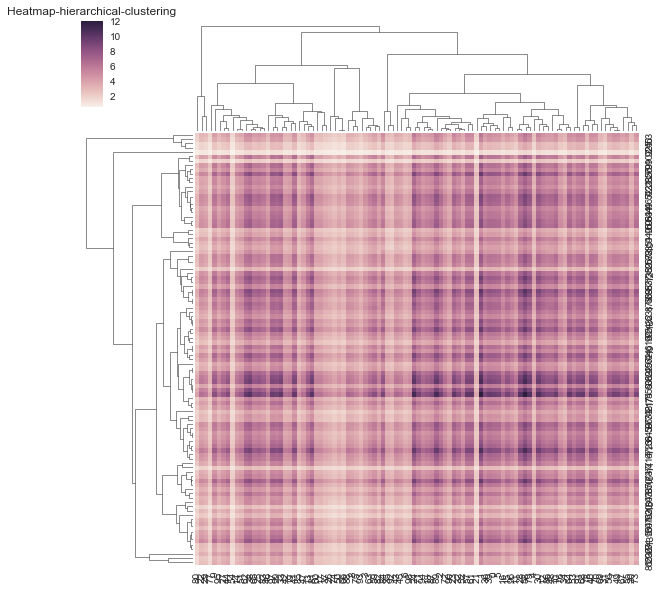

In [12]:
from numpy.linalg import matrix_rank
import math
import matplotlib.pyplot as plt
from APT_factorization import APT_recursiveElimination, APT_random, APT_GramSchmidt
RMSE_SVD = []
RMSE_APTbackward = []
RMSE_APTrandom = []
S = S_rank5
# S = random_data(100, 100, 100)
# S = S_miss
import seaborn as sns; sns.set(color_codes=True)
g = sns.clustermap(S,metric="correlation")
plt.title('Heatmap-hierarchical-clustering')
plt.show()


### APT / SVD on random matrix 100X100, rank 5 (no missing value)

Takes time!! Don't rerun it if no need!!!

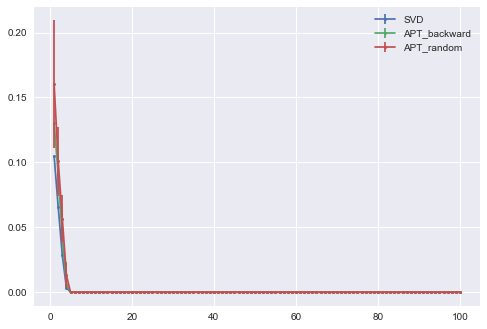

In [13]:

# S = random_data(100, 100, 5)
# from compare_methods import compare_methods
# RMSE_dict, errorbar_dict = compare_methods(S)

In [14]:
# errorbar_dict

## II.2 APT on random data (with missing value)

### Visualization of random matrix 100X100, rank 5 (missing value fraction = 0.1)

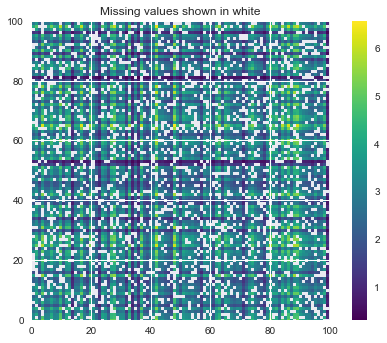

In [21]:
from random_data_generator import add_missing_value, plot_matrix_with_missing_value
S = random_data(100, 100, 5) # rank 5
frac_missing = 0.2
S_miss = add_missing_value(S, frac_missing)
plot_matrix_with_missing_value(S_miss)

### Heatmap Hierarchical clustering of random matrix 100X100, rank 5 (missing value fraction = 0.1)

After replacing by median, the matrix rank becomes:  100


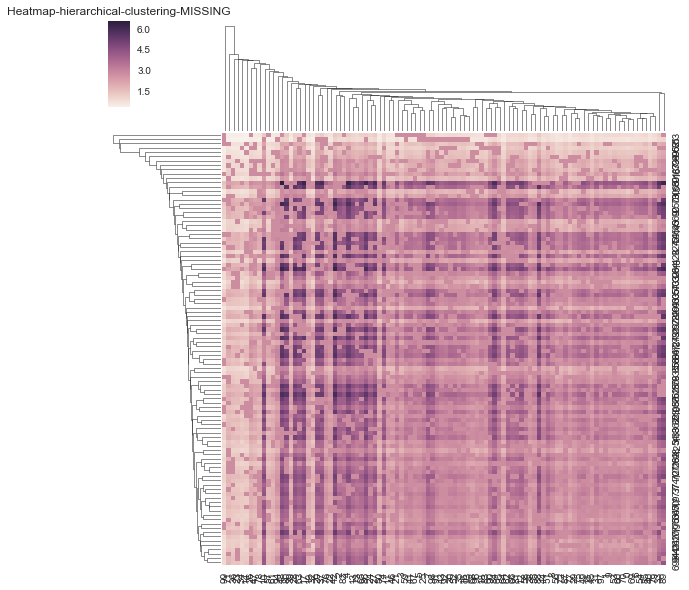

In [22]:
missing_position = np.where(np.isnan(S_miss))
non_missing_position = np.where(~np.isnan(S_miss))
num_missing_value = len(missing_position[0])
median = np.nanmedian(S_miss) # initialize with median
S_miss[missing_position] = median
print 'After replacing by median, the matrix rank becomes: ', matrix_rank(S_miss)
g_miss = sns.clustermap(S_miss,metric="correlation")
plt.title('Heatmap-hierarchical-clustering-MISSING')
plt.show()

### APT / SVD on random matrix 100X100, rank 5 (missing value fraction = 0.1)


Takes time!! Don't rerun it if no need!!!

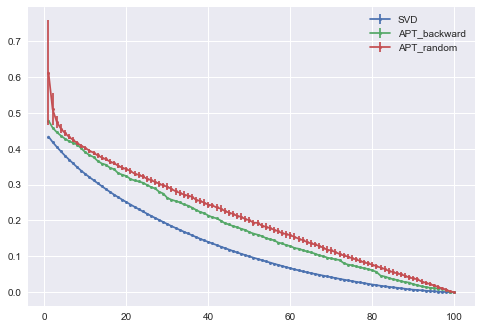

In [23]:

# from compare_methods import compare_methods
# RMSE_dict, errorbar_dict = compare_methods(S_miss, miss_err=True)

## On-going: Testing GramSchmidt and other forward selection

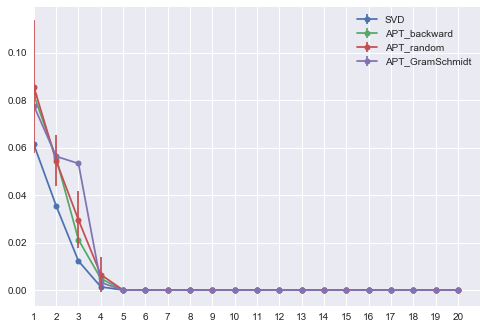

In [23]:
from compare_methods import compare_methods
S_petit = random_data(20, 20, 5)
RMSE_dict, errorbar_dict = compare_methods(S_petit, miss_err=True)